In [34]:
import json

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [35]:
dataset_names_internal = ["default", "mean", "min", "geom_mean", "harmonic_mean"]
dataset = [None]*len(dataset_names_internal)

for i in range(len(dataset_names_internal)):
    file_to_read = open(rf"grid_search\normp4_results_eq_{dataset_names_internal[i]}.json", "rb")
    dataset[i] = json.load(file_to_read)

In [36]:
def get_results(data):
    res_dict = {}
    res_dict["fitness"] = []
    res_dict["pr_auc (train)"] = []
    res_dict["pr_auc (test)"] = []
    res_dict["iou (train)"] = []
    res_dict["iou (test)"] = []
    res_dict["pr_mat"] = np.empty((len(data), len(data[0])))
    res_dict["pr_mat_count"] = np.empty((len(data), len(data[0])), dtype="int32")

    for i in range(len(data)):
        subdata = data[i]
        for j in range(len(subdata)):
            dic = subdata[j]

            res_dict["fitness"].append(dic['fitness'])
            res_dict["pr_auc (train)"].append(dic['pr_auc (train)'])
            res_dict["pr_auc (test)"].append(dic['pr_auc (test)'])
            res_dict["iou (train)"].append(dic['iou (train)'])
            res_dict["iou (test)"].append(dic['iou (test)'])

            res_dict["pr_mat"][i,j] = dic['pr_auc (train)']
            res_dict["pr_mat_count"][i,j] = dic['feature_count']

    return res_dict 

In [41]:
def plotEx(dataset, X_name, y_name, X_label, y_label, title, subtitles):
    l = len(dataset)

    ncols = 3
    odd = l % ncols > 0
    nrows = (l // ncols) + (1 if odd else 0)

    fig = plt.figure(figsize=(5.75 * ncols, 5.75 * nrows), dpi=300)
    gs = gridspec.GridSpec(nrows, 2 * ncols)
    for i in range(len(dataset)):
        x = i % ncols
        y = i // ncols

        ax = None
        if odd and y == nrows - 1:
            ax = plt.subplot(gs[y, 2 * x - 2 * ncols + 1:2 * x + 2 - 2 * ncols + 1])
        else:
            ax = plt.subplot(gs[y, 2 * x:2 * x + 2])

        data = get_results(dataset[i])
        ax.scatter(data[X_name], data[y_name])
        ax.scatter(data[X_name], data["pr_auc (test)"])
        ax.set_xlabel(X_label)
        ax.set_ylabel(y_label)
        ax.set_ylim(0.65, 0.84)
        ax.set_title(subtitles[i])#, y=0.05)
        ax.set_axisbelow(True)
        ax.grid()

    plt.tight_layout()
    plt.show()

def heatEx(dataset, data_name, X_label, y_label, title, subtitles):
    informativeness_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    independency_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    l = len(dataset)

    ncols = 3
    odd = l % ncols > 0
    nrows = (l // ncols) + (1 if odd else 0)

    fig = plt.figure(figsize=(7.5 * ncols, 5.75 * nrows), dpi=300)
    gs = gridspec.GridSpec(nrows, 2 * ncols)
    for i in range(len(dataset)):
        x = i % ncols
        y = i // ncols

        ax = None
        if odd and y == nrows - 1:
            ax = plt.subplot(gs[y, 2 * x - 2 * ncols + 1:2 * x + 2 - 2 * ncols + 1])
        else:
            ax = plt.subplot(gs[y, 2 * x:2 * x + 2])

        show_cbar = False# if (i < len(dataset) - 1) else True

        data = get_results(dataset[i])
        s = sns.heatmap(data[data_name], annot=True, cbar=show_cbar, square=True, ax=ax, 
                        xticklabels=independency_values, yticklabels=informativeness_values, 
                        vmax=12, vmin=1)#vmax=0.825, vmin=0.625)
        ax.set_title(subtitles[i])
        ax.set_xlabel(X_label)
        ax.set_ylabel(y_label)

    plt.show()

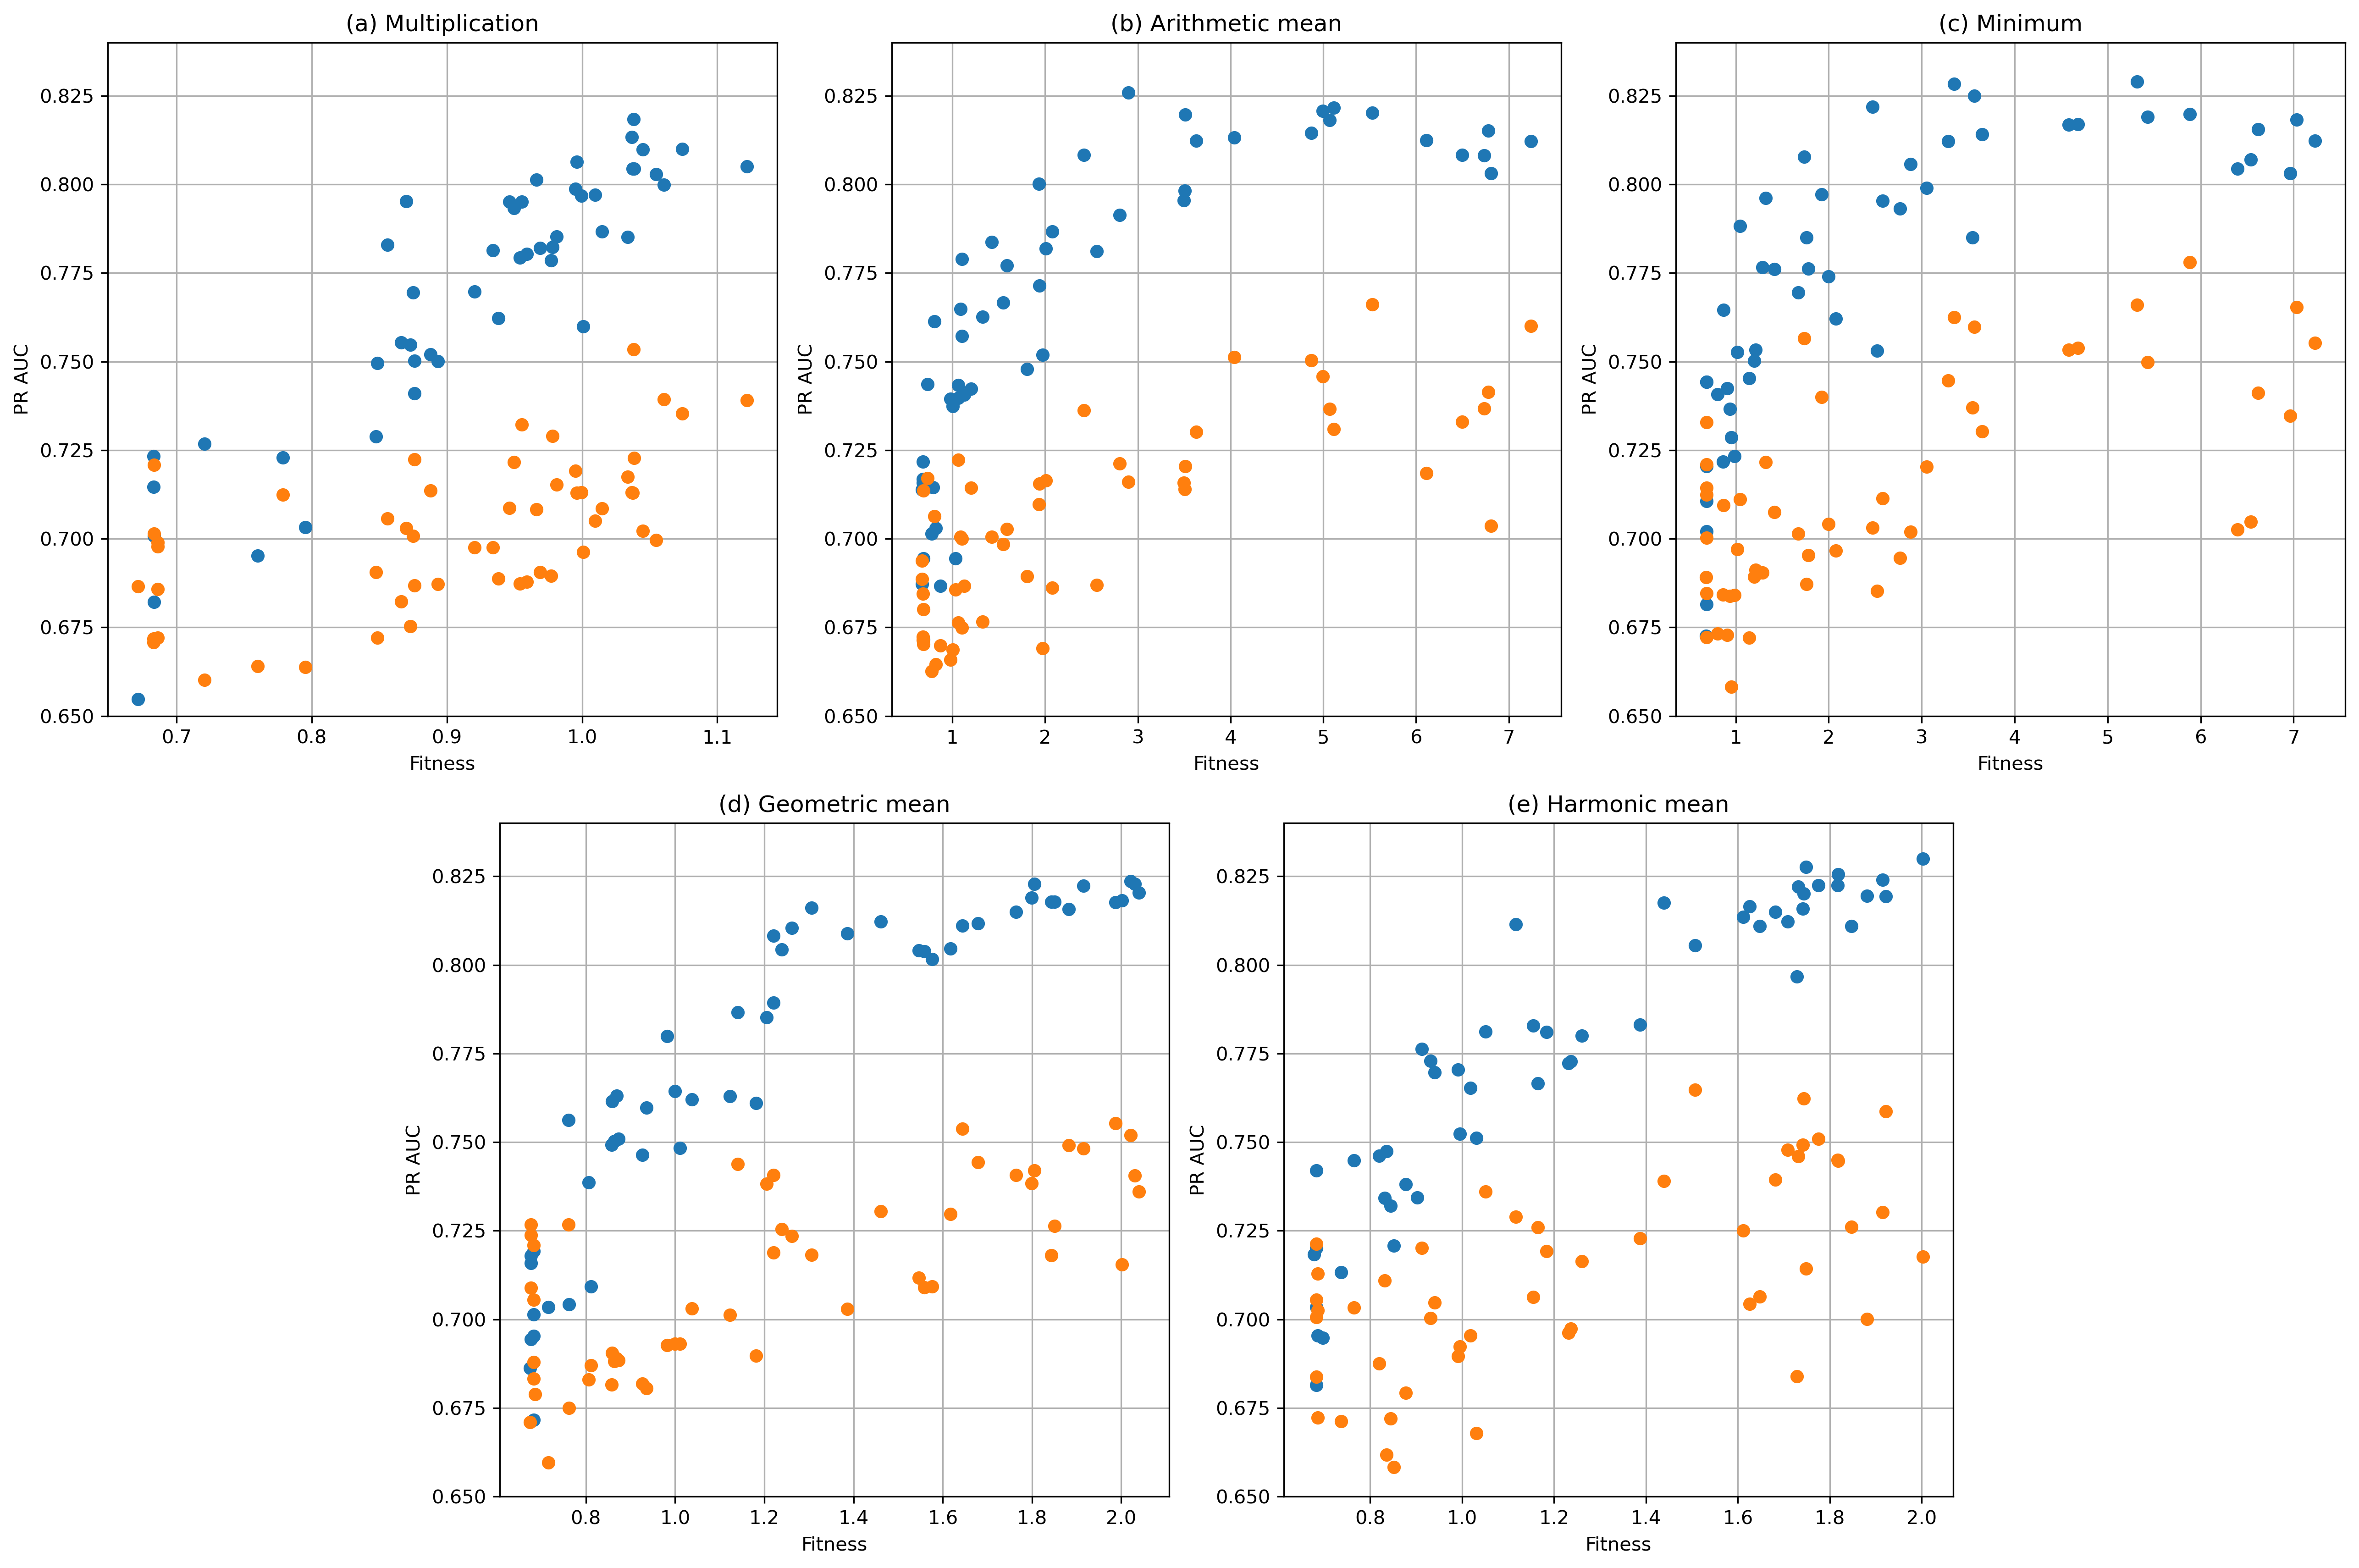

In [38]:
plotEx(dataset, "fitness", "pr_auc (train)", "Fitness", "PR AUC", "", 
       ["(a) Multiplication", "(b) Arithmetic mean", "(c) Minimum", "(d) Geometric mean", "(e) Harmonic mean"])

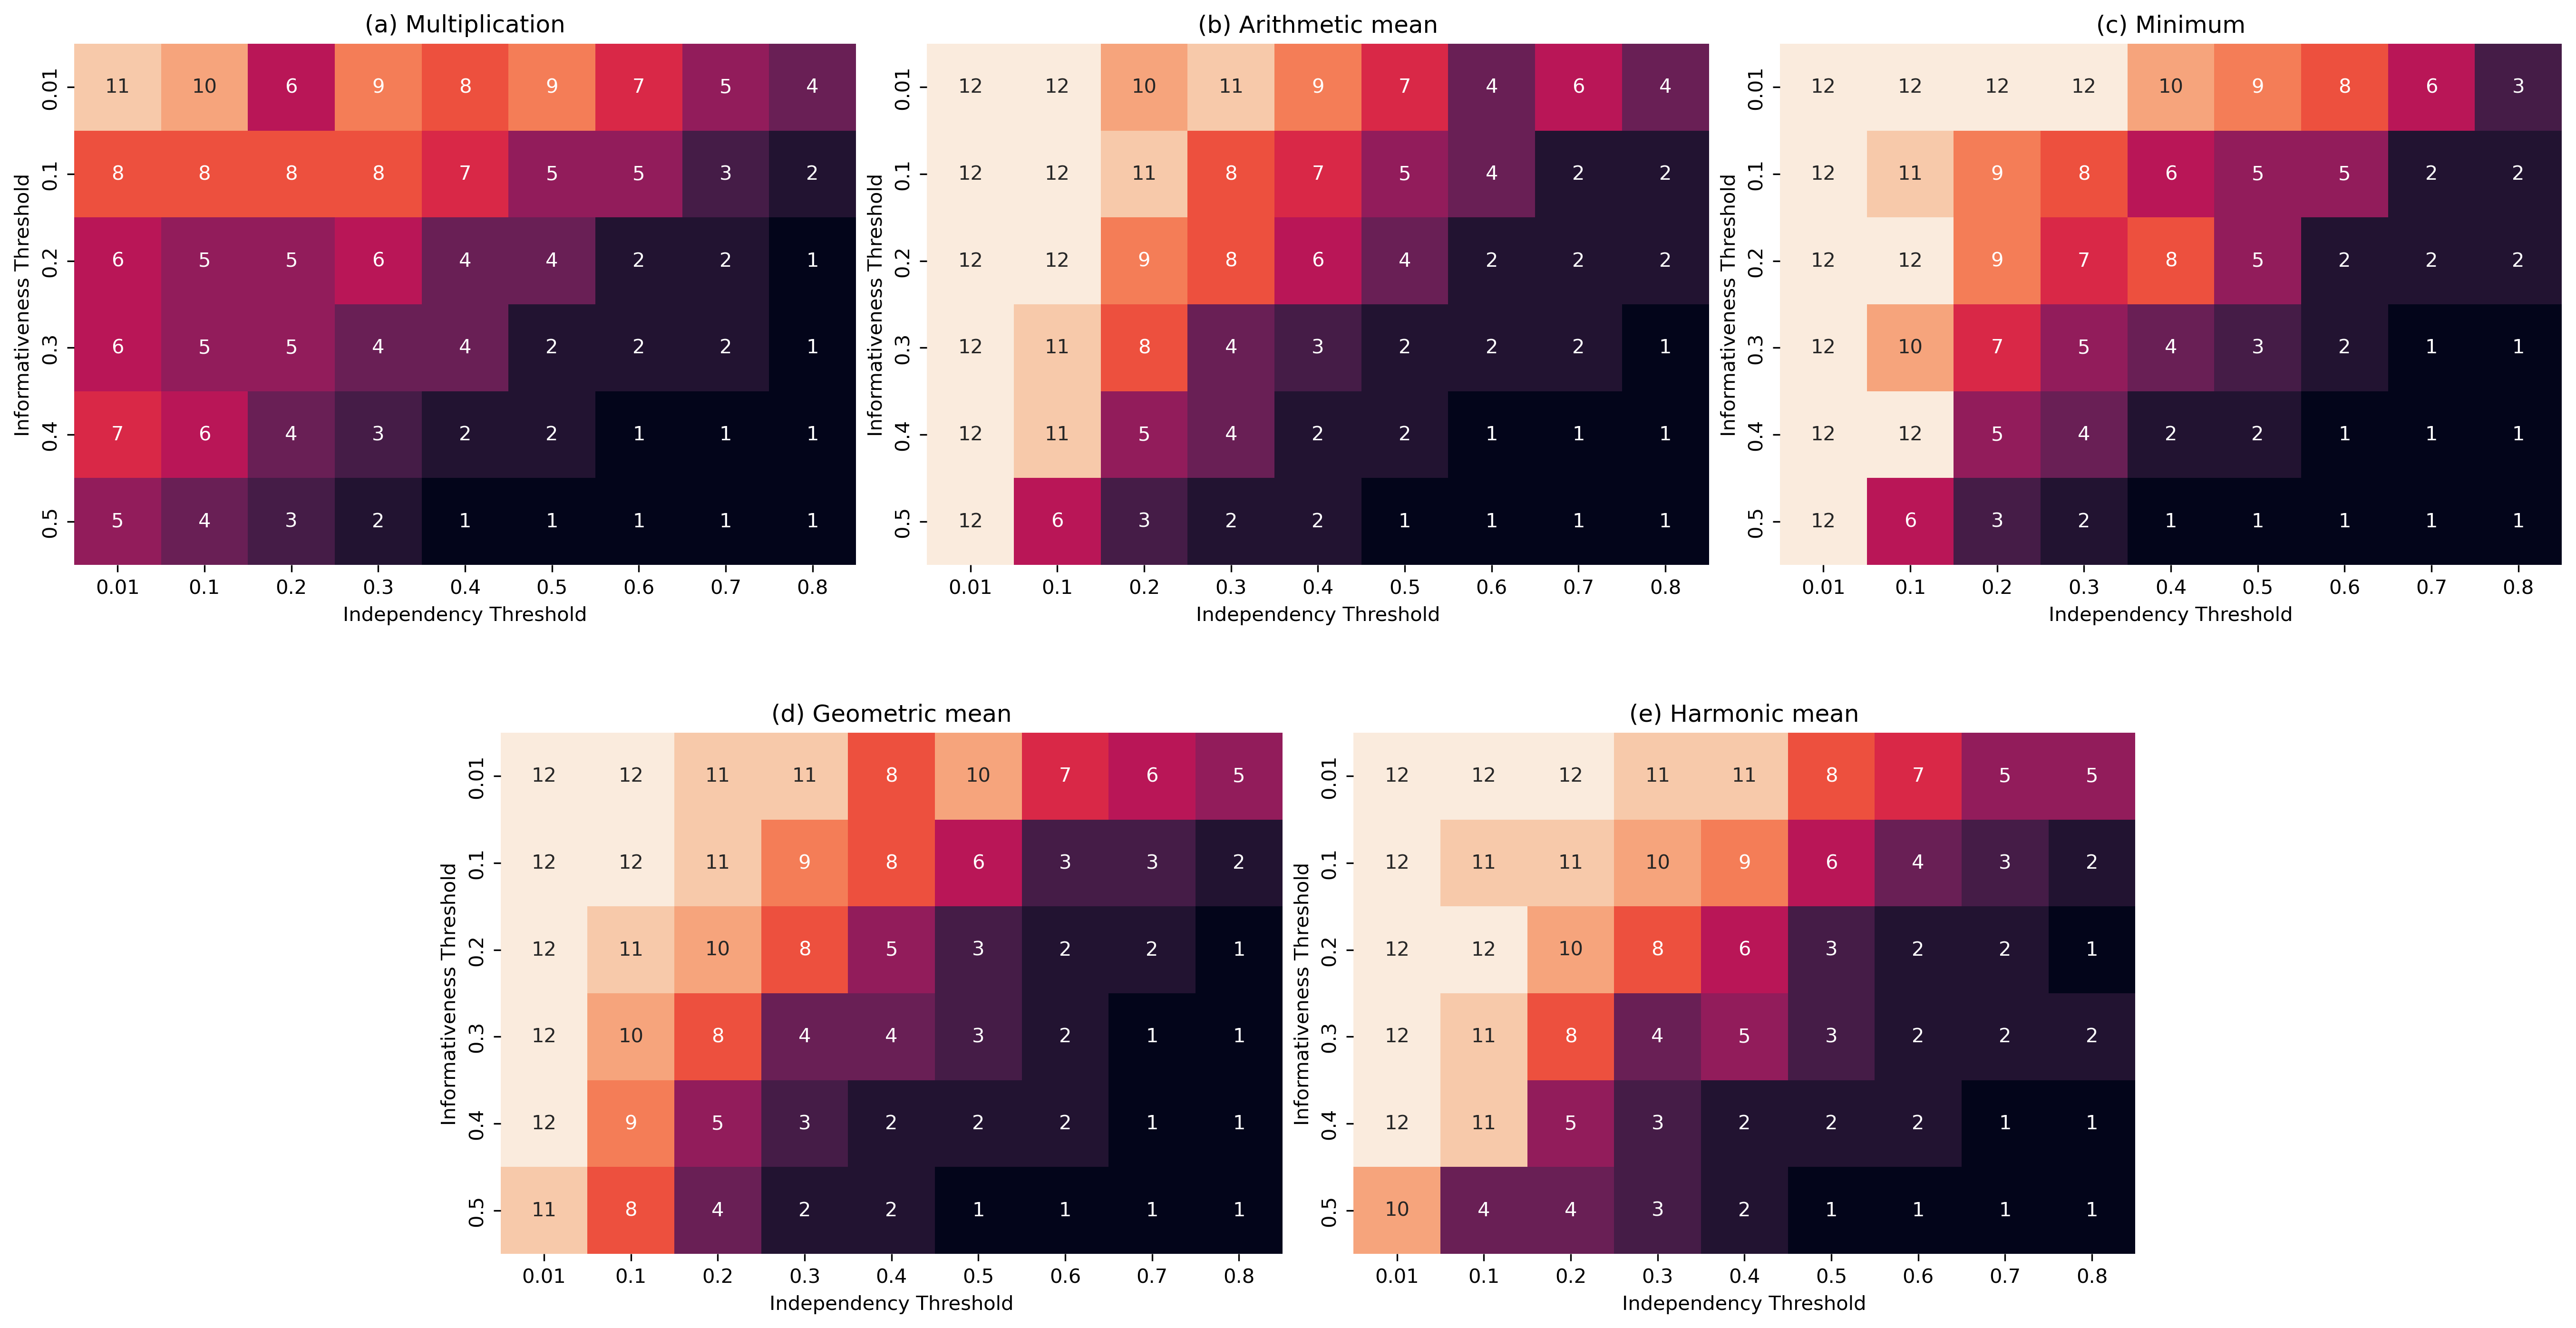

In [42]:
heatEx(dataset, "pr_mat_count", "Independency Threshold", "Informativeness Threshold", "",
       ["(a) Multiplication", "(b) Arithmetic mean", "(c) Minimum", "(d) Geometric mean", "(e) Harmonic mean"])